# Computational Physics - Activity 1
Task: Finding the position, velocity, and acceleration functions, given the force function in 1D space by using Euler’s method.<br>
Basically my teacher made most of this code, and then I used nyiyui's changes to the function to complete the given tasks.

## Case 1: Free Fall
a)  Consider the x-axis vertically up with the origin on the ground. An object is launched from 𝑥0 = 𝑥(0) (given) with velocity 𝑣0 = 𝑣(0) (given). Acceleration due to the gravity is 9.806 m/s2

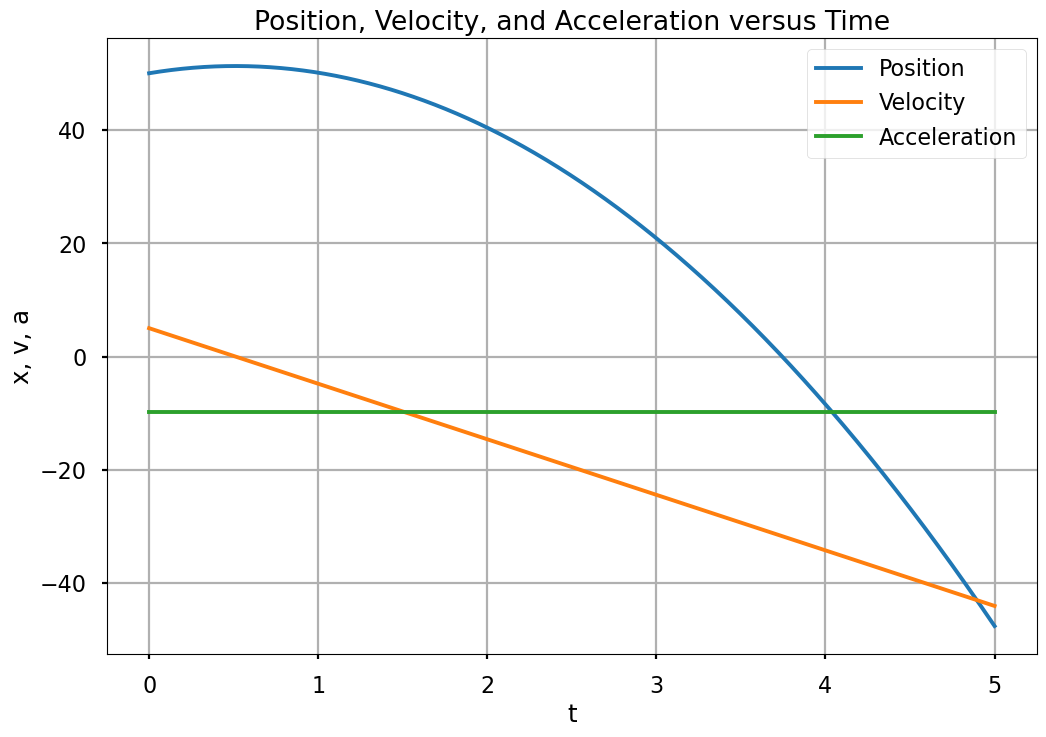

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Define mass if you need it
m = 0.5
# Air resistance if needed
b = 1.15

plt.style.use('seaborn-v0_8-poster')

# Define here the Force Function
def sum_forces(*forces):
  return lambda t, x, v: sum(force(t, x, v) for force in forces)

free_fall = lambda t, x, v: m*-9.806
air_resistance = lambda t, x, v: -b*v

F = sum_forces(free_fall)


# Choose a time interval
t1 = 0
t2 = 5

# Choose the number of steps of integration
n = 1000

# Find the time step dt
dt = (t2 - t1)/n

# make arrays for t, x, v, and a
t = np.arange(t1, t2 + dt, dt) # Time Array (n + 1 elements)
x = np.zeros(len(t)) # Position Array
v = np.zeros(len(t)) # Velocity Array
a = np.zeros(len(t)) # Acceleration Array

# Define the initial conditions x(0) and v(0)
x[0] = 50
v[0] = 5

# Explicit Euler's Method

for i in range(n): # from i = 0 to i = n - 1
    a[i] = F(t[i], x[i], v[i])/m
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + (v[i] + v[i + 1])*dt/2
    
a[n] = a[n-1] # to fill the last element of the a array

plt.figure(figsize = (12, 8))
plt.plot(t, x, '-', label = 'Position')
plt.plot(t, v, '-', label = 'Velocity')
plt.plot(t, a, '-', label = 'Acceleration')

plt.title('Position, Velocity, and Acceleration versus Time')
plt.xlabel('t')
plt.ylabel('x, v, a')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [6]:
# bc seaborn-poster is deprecated?
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Verify results are correct? <br>
The position function has parabolic behaviour, velocity is linear and decreasing, and acceleration is constant at -9.806m/s2.

b) Change the force function to include an air resistance proportional to the velocity: ```−𝑏 ∙ 𝑣```
where the coefficient 𝑏 is given (you may try a few values here)


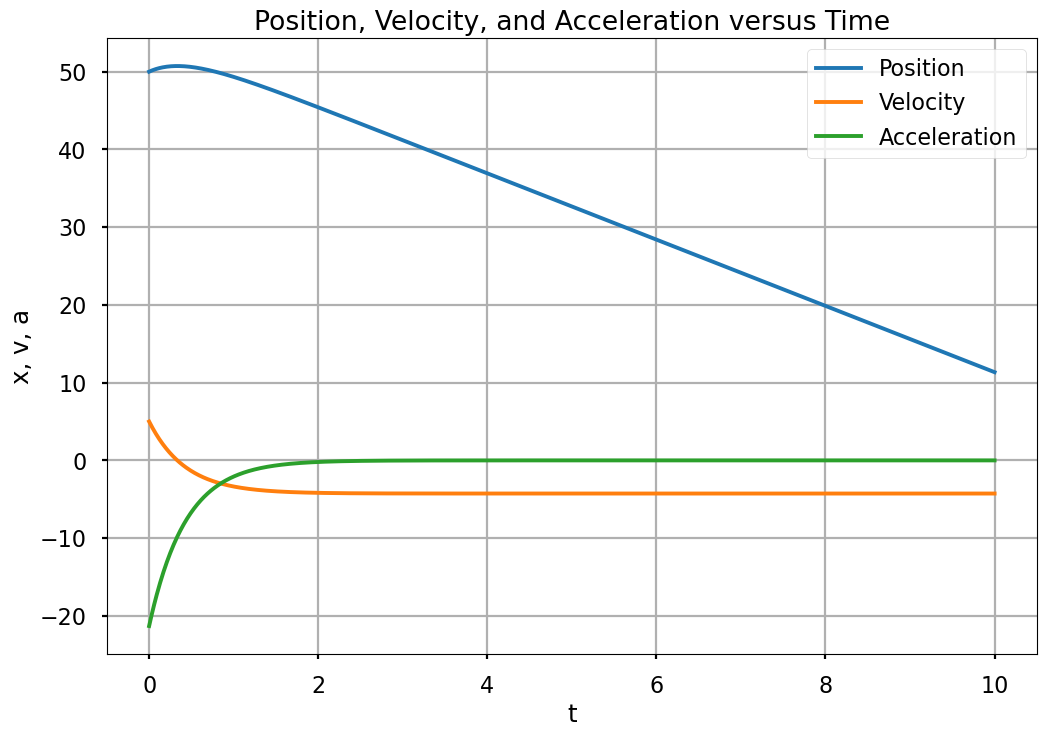

In [8]:
# mass and air resistance stay the same

plt.style.use('seaborn-v0_8-poster')

# New force function
F = sum_forces(free_fall, air_resistance)


# Choose a time interval
t1 = 0
t2 = 10

# same # of steps of integration

# Find the time step dt
dt = (t2 - t1)/n

# make arrays for t, x, v, and a
t = np.arange(t1, t2 + dt, dt) # Time Array (n + 1 elements)
x = np.zeros(len(t)) # Position Array
v = np.zeros(len(t)) # Velocity Array
a = np.zeros(len(t)) # Acceleration Array

# Define the initial conditions x(0) and v(0)
x[0] = 50
v[0] = 5

# Explicit Euler's Method

for i in range(n): # from i = 0 to i = n - 1
    a[i] = F(t[i], x[i], v[i])/m
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + (v[i] + v[i + 1])*dt/2
    
a[n] = a[n-1] # to fill the last element of the a array

plt.figure(figsize = (12, 8))
plt.plot(t, x, '-', label = 'Position')
plt.plot(t, v, '-', label = 'Velocity')
plt.plot(t, a, '-', label = 'Acceleration')

plt.title('Position, Velocity, and Acceleration versus Time')
plt.xlabel('t')
plt.ylabel('x, v, a')
plt.grid()
plt.legend(loc='upper right')
plt.show()

Comment on findings: <br>
The position function becomes more linear (reaches terminal velocity) as the velocity approaches 
a constant (terminal velocity) and acceleration approaches 0.

## Case 2: Harmonic Oscillator
a)  The function force for the harmonic oscillator is proportional to the position ```𝑥```, but directed toward the origin: ```𝐹 = −𝑘 ∙ 𝑥``` where the coefficient 𝑘 is given (you may try a few values here)

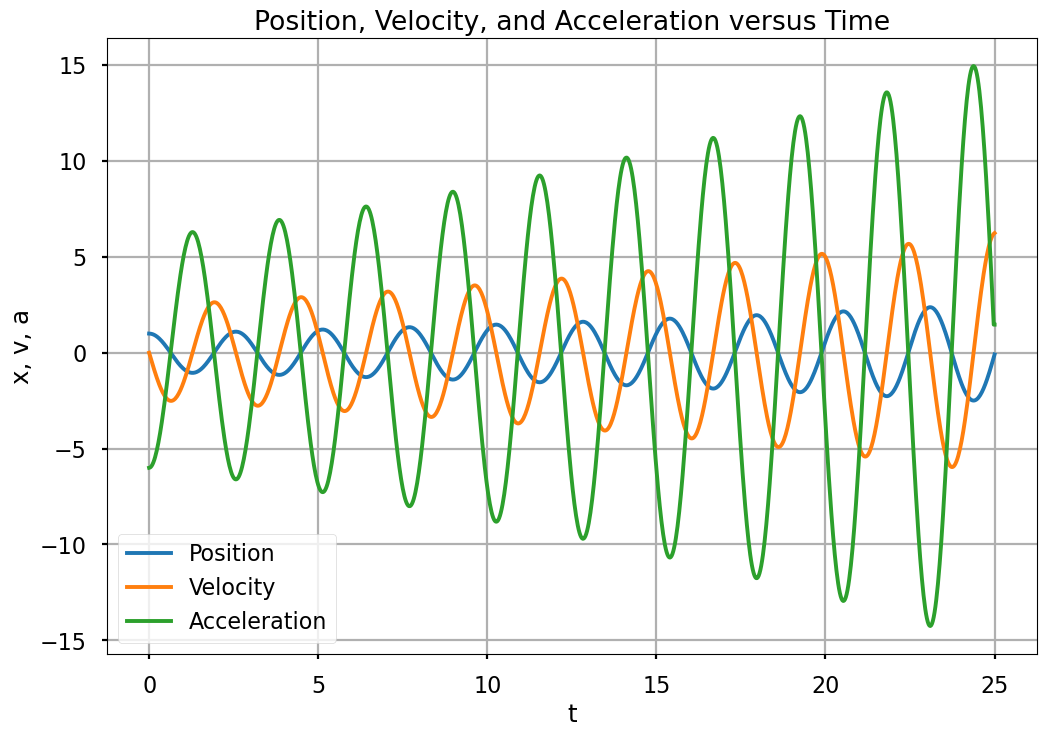

In [10]:
# same mass and air resistance
# Harmonic Oscillator coefficient
k = 3

plt.style.use('seaborn-v0_8-poster')

# New force function
harm_osc = lambda t, x, v: -k*x
F = sum_forces(harm_osc)


# Choose a time interval
t1 = 0
t2 = 25

# same # of steps of integration

# Find the time step dt
dt = (t2 - t1)/n

# make arrays for t, x, v, and a
t = np.arange(t1, t2 + dt, dt) # Time Array (n + 1 elements)
x = np.zeros(len(t)) # Position Array
v = np.zeros(len(t)) # Velocity Array
a = np.zeros(len(t)) # Acceleration Array

# Define the initial conditions x(0) and v(0)
x[0] = 1
v[0] = 0

# Explicit Euler's Method

for i in range(n): # from i = 0 to i = n - 1
    a[i] = F(t[i], x[i], v[i])/m
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + (v[i] + v[i + 1])*dt/2
    
a[n] = a[n-1] # to fill the last element of the a array

plt.figure(figsize = (12, 8))
plt.plot(t, x, '-', label = 'Position')
plt.plot(t, v, '-', label = 'Velocity')
plt.plot(t, a, '-', label = 'Acceleration')

plt.title('Position, Velocity, and Acceleration versus Time')
plt.xlabel('t')
plt.ylabel('x, v, a')
plt.grid()
plt.legend(loc='lower left')
plt.show()

Comment on findings: <br>
All 3 functions look sinusoidal, and gradually increasing in magnitude but not period. <br>

b) Change the force function to include an air resistance proportional to the velocity: ```−𝑏 ∙ 𝑣```
where the coefficient ```𝑏``` is given (you may try a few values here)


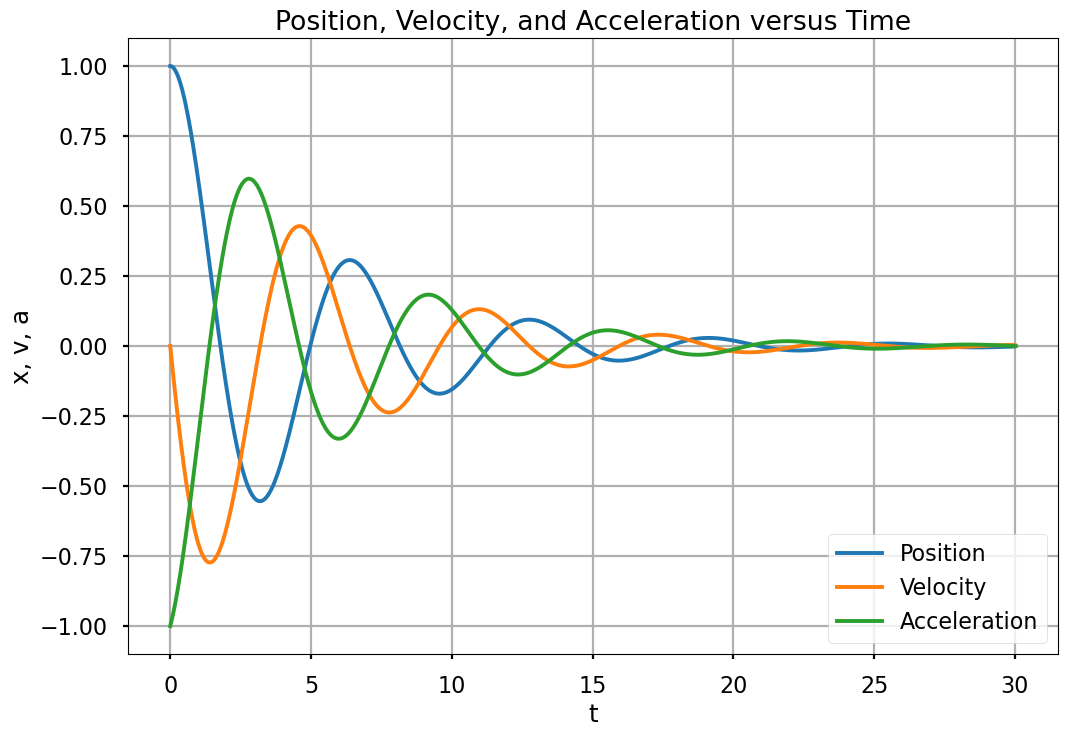

In [12]:
# mass
m = 3
# Same air resistance (1.15)
# Same Harmonic Oscillator coefficient (3)

# New force function
F = sum_forces(harm_osc, air_resistance)

# same plot style

# Choose a time interval
t1 = 0
t2 = 30

# Choose the number of steps of integration
n = 1000

# Find the time step dt
dt = (t2 - t1)/n

# make arrays for t, x, v, and a
t = np.arange(t1, t2 + dt, dt) # Time Array (n + 1 elements)
x = np.zeros(len(t)) # Position Array
v = np.zeros(len(t)) # Velocity Array
a = np.zeros(len(t)) # Acceleration Array

# Define the initial conditions x(0) and v(0)
x[0] = 1
v[0] = 0

# Explicit Euler's Method

for i in range(n): # from i = 0 to i = n - 1
    a[i] = F(t[i], x[i], v[i])/m
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + (v[i] + v[i + 1])*dt/2
    
a[n] = a[n-1] # to fill the last element of the a array

plt.figure(figsize = (12, 8))
plt.plot(t, x, '-', label = 'Position')
plt.plot(t, v, '-', label = 'Velocity')
plt.plot(t, a, '-', label = 'Acceleration')

plt.title('Position, Velocity, and Acceleration versus Time')
plt.xlabel('t')
plt.ylabel('x, v, a')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Comment on findings: <br>
All 3 functions are sinusoidal, and decreasing in magnitude while increasing in period. All 
functions are approaching 0.

## Case 3: Sinusoidal Force
Let’s assume that the particle of mass ```𝑚``` is under the effect of an external sinusoidal force of time: ```𝐹(𝑡) = 𝑎 ∙ sin(𝑏𝑡)``` where the coefficients ```𝑎``` and ```𝑏``` are given (you may try a few values here)
- changed given coefficients to ```c``` and ```d``` respectively, becuase I'm already using ```b``` as an air resistance coefficient.

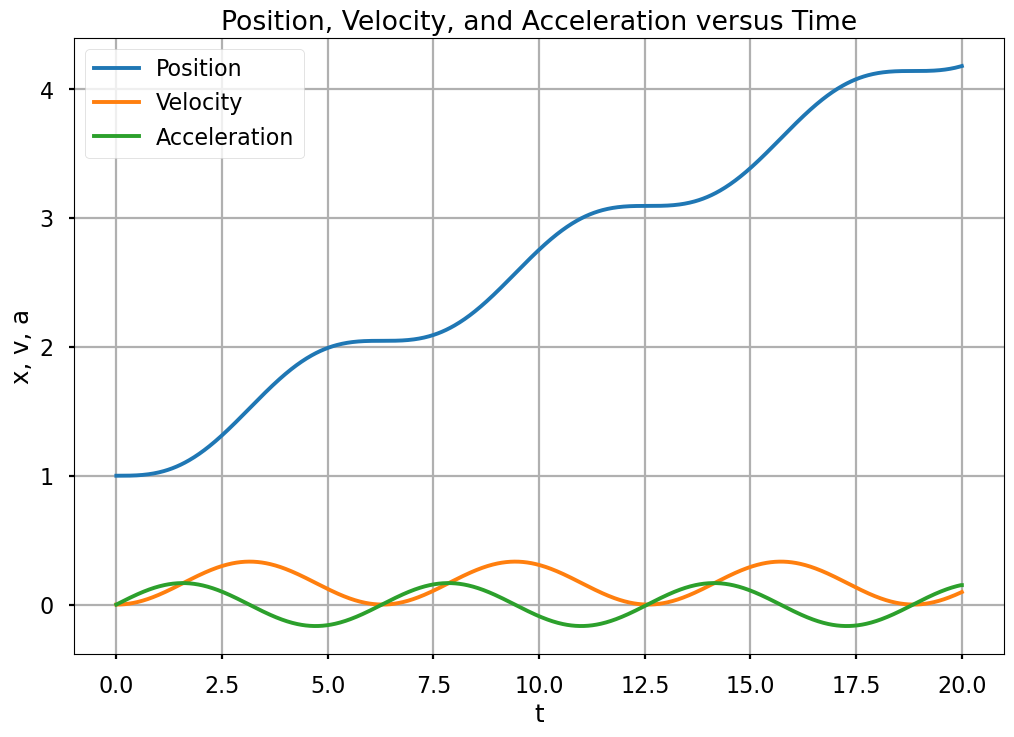

In [13]:
# mass stays same (3)
# air resistance stays same (1.15)
# Harmonic Oscillator coefficient stays same (3)
# sinusoidal force coefficients
c = 0.5
d = 1

# same plot style

# New Force Function
sinusoidal = lambda t, x, v: c * math.sin(d*t)
F = sum_forces(sinusoidal)


# Choose a time interval
t1 = 0
t2 = 20

# Choose the number of steps of integration
n = 1000

# Find the time step dt
dt = (t2 - t1)/n

# make arrays for t, x, v, and a
t = np.arange(t1, t2 + dt, dt) # Time Array (n + 1 elements)
x = np.zeros(len(t)) # Position Array
v = np.zeros(len(t)) # Velocity Array
a = np.zeros(len(t)) # Acceleration Array

# Define the initial conditions x(0) and v(0)
x[0] = 1
v[0] = 0

# Explicit Euler's Method

for i in range(n): # from i = 0 to i = n - 1
    a[i] = F(t[i], x[i], v[i])/m
    v[i + 1] = v[i] + a[i] * dt
    x[i + 1] = x[i] + (v[i] + v[i + 1])*dt/2
    
a[n] = a[n-1] # to fill the last element of the a array

plt.figure(figsize = (12, 8))
plt.plot(t, x, '-', label = 'Position')
plt.plot(t, v, '-', label = 'Velocity')
plt.plot(t, a, '-', label = 'Acceleration')

plt.title('Position, Velocity, and Acceleration versus Time')
plt.xlabel('t')
plt.ylabel('x, v, a')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Comment on findings: <br>
All 3 functions are sinusoidal with constant magnitudes and periods. Velocity and acceleration seem to be going directly horizontally while position is increasing in a linear fashion.

## Case 4: Invent a situation by combining some of the forces above, update the code.
The particle of mass m free falls (w/ air resistance) into harmonic oscillation (w/ another fluid resistance, like water resistance), where it can oscillate back into the air temporarily. x=0 is where the environment changes, and the origin is where the oscillation is directed towards.

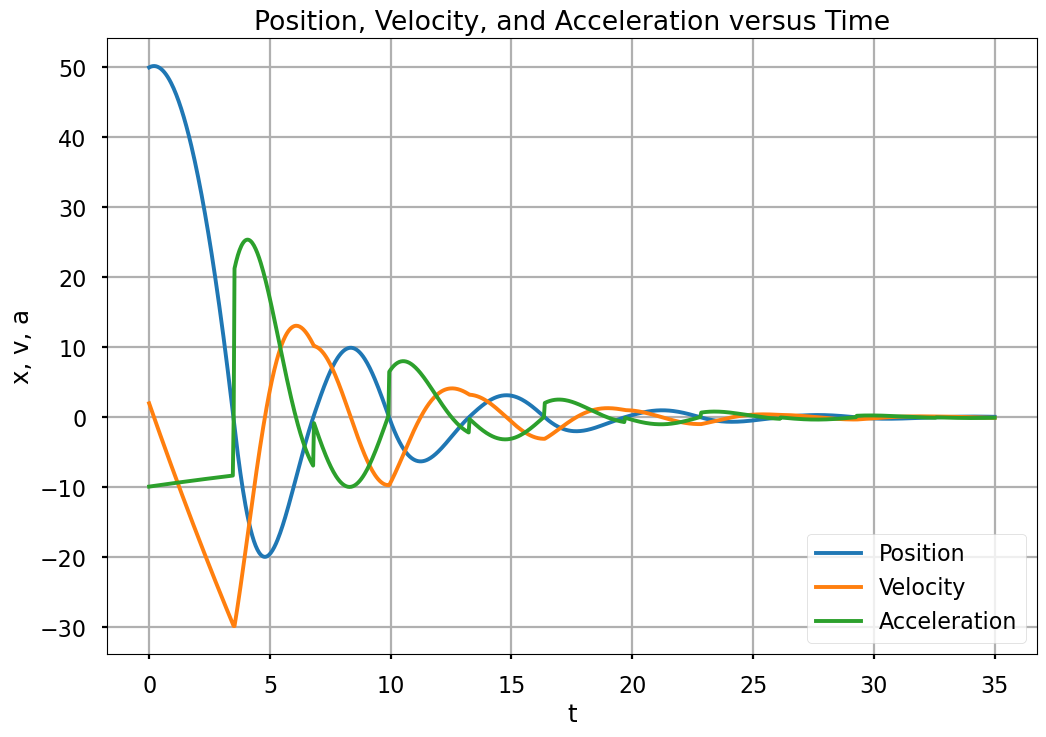

In [14]:
# mass same (3)
# resistances
b1 = 0.15 #air
b2 = 2 #water
# Harmonic Oscillator coefficient same (3)

# same plot style

# Some new force functions introduced
free_fall = lambda t, x, v: m*-9.806
air_resist = lambda t, x, v: -b1*v
water_resist = lambda t, x, v: -b2*v
harm_osc = lambda t, x, v: -k*x
sinusoidal = lambda t, x, v: c * math.sin(d*t)

# scenarios
# free fall w/ air resistance
F1 = sum_forces(free_fall, air_resist) 
# harmonic oscillation directed towards origin w/ water resistance 
# ("water level" is at x=0)
F2 = sum_forces(harm_osc, water_resist)
# harmonic oscillation directed towards origin w/ air resistance
F3 = sum_forces(harm_osc, air_resist)

# Choose a time interval
t1 = 0
t2 = 35

# Choose the number of steps of integration
n = 1000

# Find the time step dt
dt = (t2 - t1)/n

# make arrays for t, x, v, and a
t = np.arange(t1, t2 + dt, dt) # Time Array (n + 1 elements)
x = np.zeros(len(t)) # Position Array
v = np.zeros(len(t)) # Velocity Array
a = np.zeros(len(t)) # Acceleration Array

# Define the initial conditions x(0) and v(0)
x[0] = 50
v[0] = 2

# Explicit Euler's Method

impact = False
for i in range(n): # from i = 0 to i = n - 1
  
  # has not hit the water yet
  if (not impact):
    # free falling above water
    if (x[i] > 0):
      a[i] = F1(t[i], x[i], v[i])/m
    # hits water
    else:
      impact = True
  # has hit water (made impact)
  else:
    # harm osc in water
    if (x[i] < 0):
      a[i] = F2(t[i], x[i], v[i])/m
    # harm osc in air
    else:
      a[i] = F3(t[i], x[i], v[i])/m
  
  v[i + 1] = v[i] + a[i] * dt
  x[i + 1] = x[i] + (v[i] + v[i + 1])*dt/2
    
a[n] = a[n-1] # to fill the last element of the a array

plt.figure(figsize = (12, 8))
plt.plot(t, x, '-', label = 'Position')
plt.plot(t, v, '-', label = 'Velocity')
plt.plot(t, a, '-', label = 'Acceleration')

plt.title('Position, Velocity, and Acceleration versus Time')
plt.xlabel('t')
plt.ylabel('x, v, a')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Comment on Findings: <br>
Initial free fall is as expected. Regarding the oscillation there is a sharp change in acceleration whenever the environment (in water or in air) changes. Magnitude of acceleration seems to decrease when going from air to water, and increase when going from water to air. Velocity also undergoes changes when changing environments, but at a less pronounced level. 